In [1]:
import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
IMAGE_PATH = './Data/Image_Spotify/'

In [3]:
genres = list(os.listdir(IMAGE_PATH))

In [4]:
image = cv2.imread('./Data/Image_Spotify/blues/1_0.png')
IMSIZE = image.shape[0]
image.shape

(512, 512, 3)

##### Choose whether to work with RGB or GRAY arrays

In [3]:
# Images as RGB arrays (shape (256,256,3))
genres = list(os.listdir(IMAGE_PATH))
images = []
labels = []
for genre in genres:
    genre_path = f'{IMAGE_PATH}/{genre}/'
    genre_images = list(os.listdir(genre_path))
    
    counter = 0
    for image_path in genre_images:
        image = cv2.imread(os.path.join(genre_path, image_path))
        
        images.append(image)
        labels.append(genre)
        counter += 1
        if counter > 200:
            break

In [3]:
# Images as GRAY arrays (shape (256,256))
genres = list(os.listdir(IMAGE_PATH))
images = []
labels = []
for genre in genres:
    genre_path = f'{IMAGE_PATH}/{genre}/'
    genre_images = list(os.listdir(genre_path))
    
    for image_path in genre_images:
        image = cv2.imread(os.path.join(genre_path, image_path), 0)
        
        images.append(image)
        labels.append(genre)

In [3]:
genres = list(os.listdir(IMAGE_PATH))
labels = []
for genre in genres:
    genre_path = f'{IMAGE_PATH}/{genre}/'
    genre_images = list(os.listdir(genre_path))
    for image_path in genre_images:
        labels.append(genre)

##### Choose appropiate scaler for RGB or GRAY images

In [4]:
scaler = StandardScaler()
images = np.array(images)
shape = images.shape

# Flatten images for scaling
images = images.reshape(-1, shape[1] * shape[2] * shape[3])

images = scaler.fit_transform(images)

# Reshape to original form
images = images.reshape(-1, shape[1], shape[2], shape[3])

images = list(images)

In [4]:
scaler = StandardScaler()
images = np.array(images)
shape = images.shape

# Flatten images for scaling
images = images.reshape(-1, shape[1] * shape[2])

images = scaler.fit_transform(images)

# Reshape to original form
images = images.reshape(-1, shape[1], shape[2])

images.shape
# images = list(images)

(19998, 256, 256)

In [5]:
images = np.array(images)
images[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
encoder = LabelEncoder()
one_hot_labels = encoder.fit_transform(np.array(labels).reshape(-1, 1).ravel())
one_hot_labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [6]:
dataset = pd.DataFrame({'image': images, 'label': one_hot_labels})
dataset

,image,label
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
...,...,...
2005,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
2006,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
2007,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
2008,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9


In [7]:
X = dataset.image.values
y = dataset.label.values
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=labels, test_size=0.3)
y_train

array([5, 6, 1, ..., 4, 7, 7], dtype=int64)

In [7]:
X = images
y = one_hot_labels
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=labels, test_size=0.2)
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### CNN

In [5]:
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import utils
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from keras.regularizers import l2

In [8]:
# Clean variables:
# del dataset
del encoder
del genre
del genre_images
del genre_path
del image
del image_path
del images
del labels
del one_hot_labels
del scaler
del shape
del X
del y

In [ ]:
X_train_tensor = tf.convert_to_tensor(X_train.tolist())
X_test_tensor = tf.convert_to_tensor(X_test.tolist())
y_train_tensor = tf.convert_to_tensor(to_categorical(y_train, len(genres)))
y_test_tensor = tf.convert_to_tensor(to_categorical(y_test, len(genres)))
X_train_tensor

In [11]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(TensorShape([808, 256, 256, 3]),
 TensorShape([202, 256, 256, 3]),
 TensorShape([808, 10]),
 TensorShape([202, 10]))

In [11]:
del X_train
del X_test
del y_train
del y_test

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory('./Data/Image_Spotify/',
                                                    target_size=(IMSIZE, IMSIZE),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory('./Data/Image_Spotify_Test/',
                                                    target_size=(IMSIZE, IMSIZE),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 20000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./Data/Image_Spotify/',
                                                    target_size=(IMSIZE, IMSIZE),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)

validation_generator = datagen.flow_from_directory('./Data/Image_Spotify/',
                                                    target_size=(IMSIZE, IMSIZE),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='validation',
                                                    shuffle=False)

Found 25600 images belonging to 10 classes.
Found 6400 images belonging to 10 classes.


##### Choose the appropiate CNN model for RGB or GRAY

In [11]:
model = Sequential(name='cnn')

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    activation='relu',
                    input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# [print(i.shape, i.dtype) for i in model.inputs]
# [print(o.shape, o.dtype) for o in model.outputs]
# [print(l.name, l.input_shape, l.dtype) for l in model.layers]

history = model.fit(X_train_tensor,
                    y_train_tensor,
                    batch_size=128,
                    validation_data=(X_test_tensor, y_test_tensor),
                    epochs=50)

Epoch 1/50
11/11 [==============================] - 34s 3s/step - loss: 3.9422 - accuracy: 0.1407 - val_loss: 2.2176 - val_accuracy: 0.2172
Epoch 2/50
11/11 [==============================] - 31s 3s/step - loss: 1.9796 - accuracy: 0.2964 - val_loss: 1.7571 - val_accuracy: 0.3665
Epoch 3/50
11/11 [==============================] - 31s 3s/step - loss: 1.7182 - accuracy: 0.3646 - val_loss: 1.6721 - val_accuracy: 0.4312
Epoch 4/50
11/11 [==============================] - 32s 3s/step - loss: 1.5776 - accuracy: 0.4478 - val_loss: 1.6096 - val_accuracy: 0.4395
Epoch 5/50
11/11 [==============================] - 34s 3s/step - loss: 1.4395 - accuracy: 0.4996 - val_loss: 1.5392 - val_accuracy: 0.4726
Epoch 6/50
11/11 [==============================] - 34s 3s/step - loss: 1.3152 - accuracy: 0.5402 - val_loss: 1.4482 - val_accuracy: 0.5224
Epoch 7/50
11/11 [==============================] - 34s 3s/step - loss: 1.1775 - accuracy: 0.5991 - val_loss: 1.4093 - val_accuracy: 0.5323
Epoch 8/50
11/11 [==

KeyboardInterrupt: 

In [31]:
np.set_printoptions(threshold=np.inf)
X_train_tensor[0][0]
for elem in X_train_tensor[0]:
    for element in elem:
        if element != 0:
            print(element)

tf.Tensor(-0.21158455, shape=(), dtype=float32)
tf.Tensor(-0.2071065, shape=(), dtype=float32)
tf.Tensor(-0.19809888, shape=(), dtype=float32)
tf.Tensor(-0.19899511, shape=(), dtype=float32)
tf.Tensor(-0.20450228, shape=(), dtype=float32)
tf.Tensor(-0.20488812, shape=(), dtype=float32)
tf.Tensor(-0.20470531, shape=(), dtype=float32)
tf.Tensor(-0.20882593, shape=(), dtype=float32)
tf.Tensor(-0.20500438, shape=(), dtype=float32)
tf.Tensor(-0.19873133, shape=(), dtype=float32)
tf.Tensor(-0.21475951, shape=(), dtype=float32)
tf.Tensor(-0.20242219, shape=(), dtype=float32)
tf.Tensor(-0.20274077, shape=(), dtype=float32)
tf.Tensor(-0.20731156, shape=(), dtype=float32)
tf.Tensor(-0.21076313, shape=(), dtype=float32)
tf.Tensor(-0.21390186, shape=(), dtype=float32)
tf.Tensor(-0.2050178, shape=(), dtype=float32)
tf.Tensor(-0.20892043, shape=(), dtype=float32)
tf.Tensor(-0.20938875, shape=(), dtype=float32)
tf.Tensor(-0.19705102, shape=(), dtype=float32)
tf.Tensor(-0.2066318, shape=(), dtype=floa

In [7]:
model = Sequential(name='cnn')

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same',
                    input_shape=(IMSIZE, IMSIZE, 1)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()

earlystopper = EarlyStopping(patience=8, verbose=1)
checkpointer = ModelCheckpoint(filepath = './Models/CNN.{epoch:02d}-{val_loss:.6f}.hdf5',
                               verbose=1,
                               save_best_only=True, save_weights_only = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1)

history = model.fit(train_generator,
                steps_per_epoch=train_generator.n//batch_size,
                epochs=15,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//batch_size,
                callbacks=[earlystopper, checkpointer, reduce_lr])

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 512, 512, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512, 512, 32)      0         
                                                                 
 dropout (Dropout)           (None, 512, 512, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248    

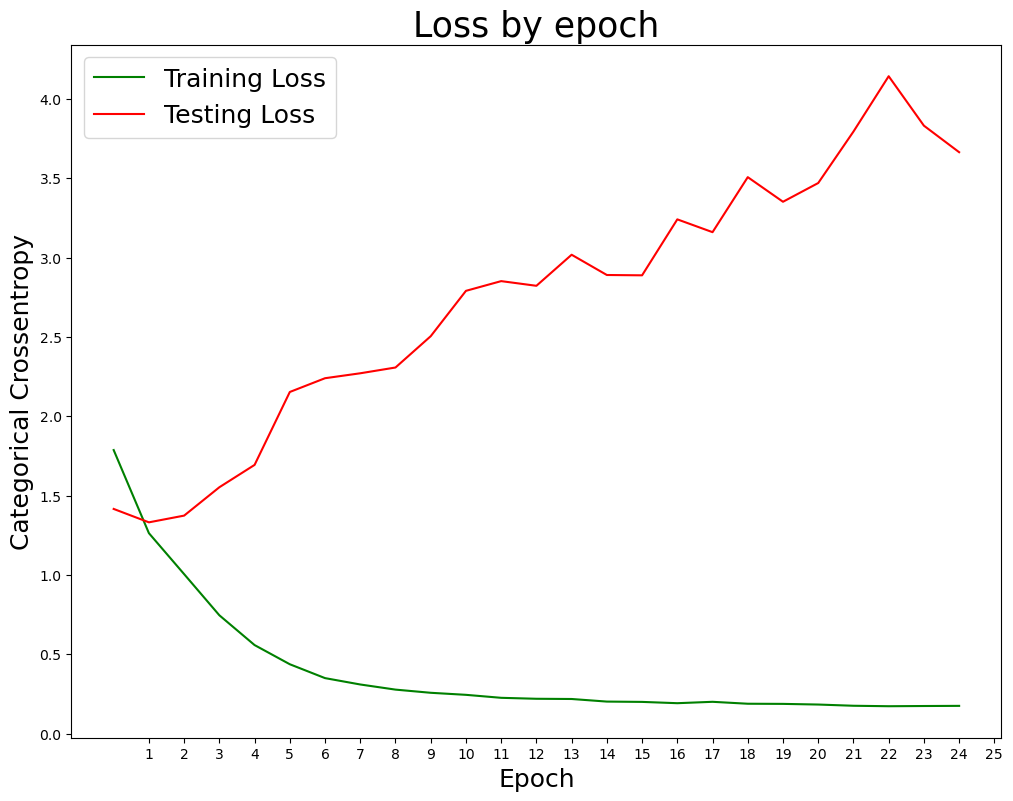

In [8]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 9))

plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Testing Loss', color='red')

plt.title('Loss by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(1, 26), range(1, 26))

plt.legend(fontsize=18)

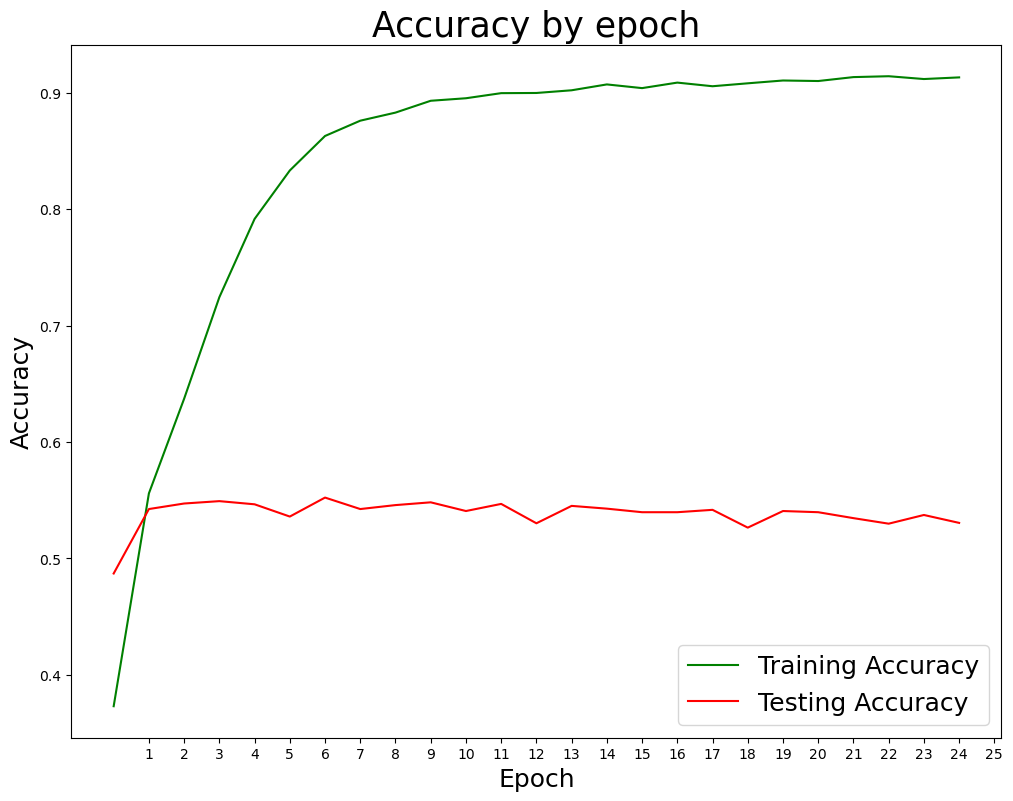

In [9]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 9))

plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Testing Accuracy', color='red')

plt.title('Accuracy by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(range(1, 26), range(1, 26))

plt.legend(fontsize=18)

In [10]:
model.save_weights('./Models/CNN.cpkt')

pickle.dump(history.history, open('./Models/CNN_history.pkl', 'wb'))

In [11]:
y_pred = model.predict_generator(validation_generator)
y_actual = validation_generator.classes

C:\Users\prico\AppData\Local\Temp\ipykernel_19092\1557035564.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator)


[Text(0.5, 69.7222222222222, 'Predicted Values'),
 Text(120.72222222222221, 0.5, 'Actual Values')]

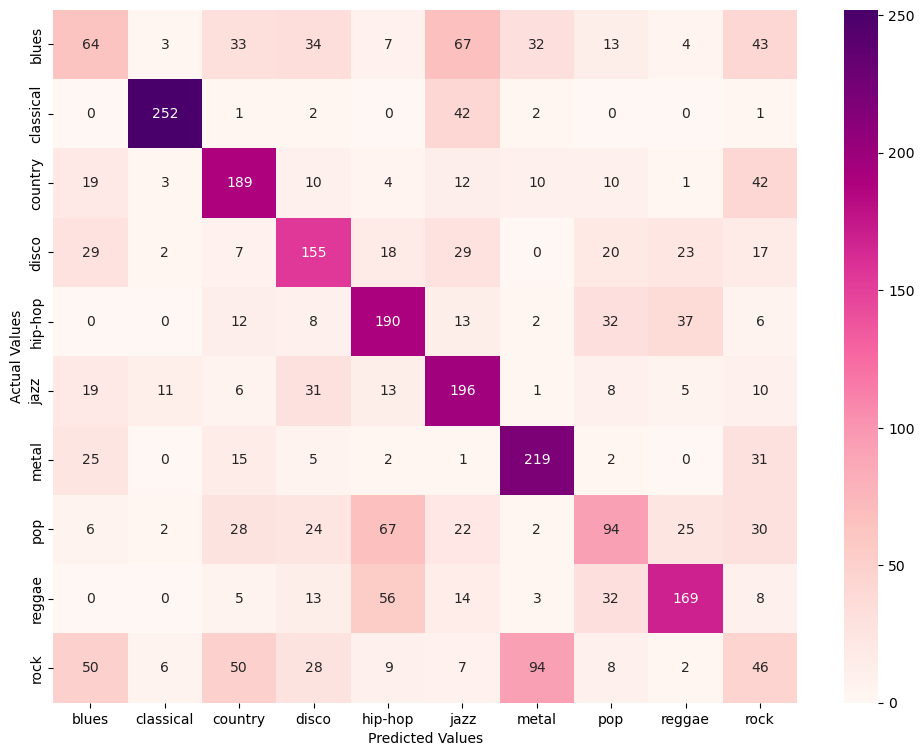

In [17]:
cm = confusion_matrix(y_actual, y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, fmt='d', cmap='RdPu')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')

In [19]:
print(classification_report(y_actual, y_pred.argmax(axis=1), target_names=genres))

              precision    recall  f1-score   support

       blues       0.30      0.21      0.25       300
   classical       0.90      0.84      0.87       300
     country       0.55      0.63      0.59       300
       disco       0.50      0.52      0.51       300
     hip-hop       0.52      0.63      0.57       300
        jazz       0.49      0.65      0.56       300
       metal       0.60      0.73      0.66       300
         pop       0.43      0.31      0.36       300
      reggae       0.64      0.56      0.60       300
        rock       0.20      0.15      0.17       300

    accuracy                           0.52      3000
   macro avg       0.51      0.52      0.51      3000
weighted avg       0.51      0.52      0.51      3000



In [16]:
X_train.shape

(4000, 256, 256)

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [20]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D
from keras import Model

base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add our own classification head on top of the MobileNet base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                steps_per_epoch=train_generator.n//batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//batch_size)

C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
156/156 [==============================] - 362s 2s/step - loss: 1.1770 - accuracy: 0.5861 - val_loss: 1.5409 - val_accuracy: 0.4918
Epoch 2/25
156/156 [==============================] - 368s 2s/step - loss: 0.8124 - accuracy: 0.7066 - val_loss: 1.4881 - val_accuracy: 0.4912
Epoch 3/25
156/156 [==============================] - 369s 2s/step - loss: 0.6071 - accuracy: 0.7803 - val_loss: 1.5106 - val_accuracy: 0.5109
Epoch 4/25
156/156 [==============================] - 407s 3s/step - loss: 0.4471 - accuracy: 0.8382 - val_loss: 1.8749 - val_accuracy: 0.4837
Epoch 5/25
156/156 [==============================] - 437s 3s/step - loss: 0.3642 - accuracy: 0.8659 - val_loss: 1.8848 - val_accuracy: 0.5343
Epoch 6/25
156/156 [==============================] - 400s 3s/step - loss: 0.3035 - accuracy: 0.8902 - val_loss: 1.9120 - val_accuracy: 0.5312
Epoch 7/25
156/156 [==============================] - 383s 2s/step - loss: 0.2636 - accuracy: 0.9052 - val_loss: 2.1569 - val_accuracy: 0.5136

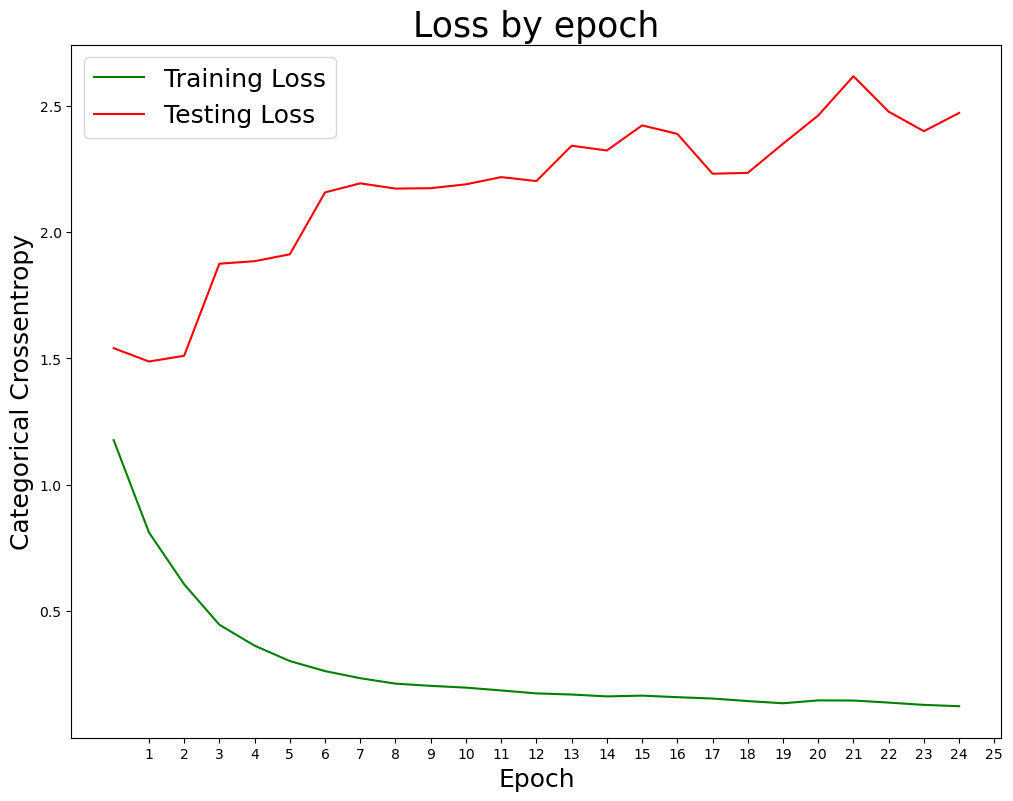

In [21]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 9))

plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Testing Loss', color='red')

plt.title('Loss by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(1, 26), range(1, 26))

plt.legend(fontsize=18)

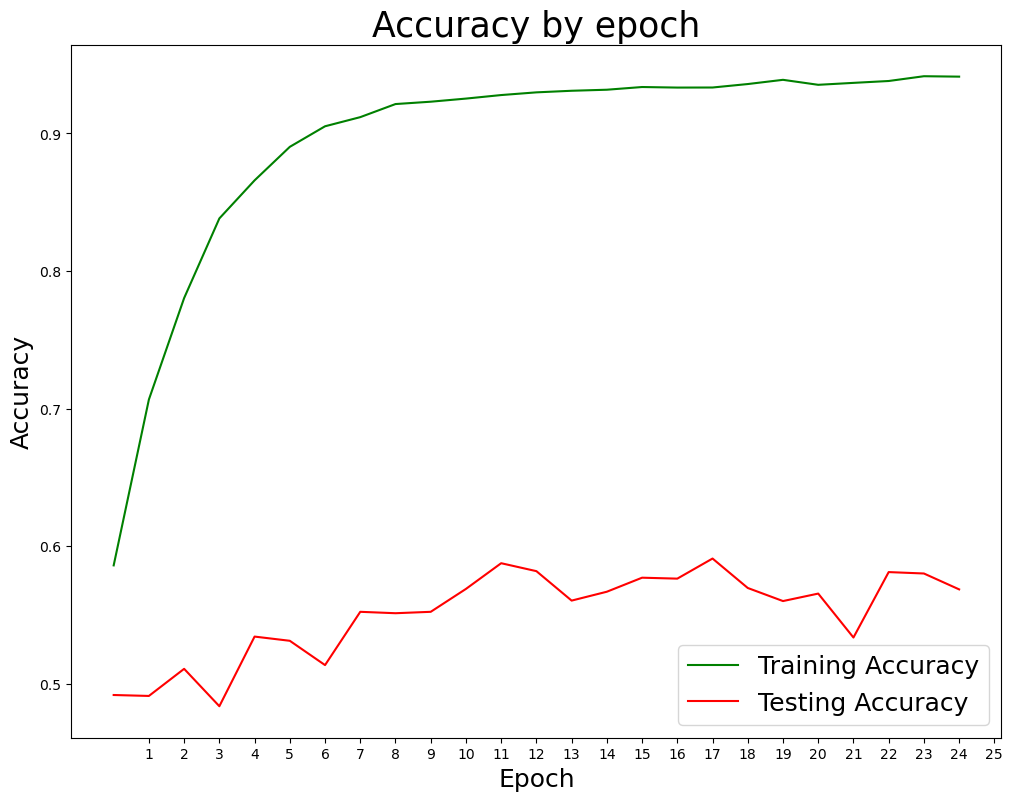

In [22]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 9))

plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Testing Accuracy', color='red')

plt.title('Accuracy by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(range(1, 26), range(1, 26))

plt.legend(fontsize=18)

In [23]:
model.save_weights('./Models/Transfer_MobileNet.cpkt')

pickle.dump(history.history, open('./Models/Transfer_MobileNet_history.pkl', 'wb'))

In [24]:
y_pred = model.predict_generator(validation_generator)
y_actual = validation_generator.classes

C:\Users\prico\AppData\Local\Temp\ipykernel_19092\1557035564.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator)


[Text(0.5, 69.7222222222222, 'Predicted Values'),
 Text(120.72222222222221, 0.5, 'Actual Values')]

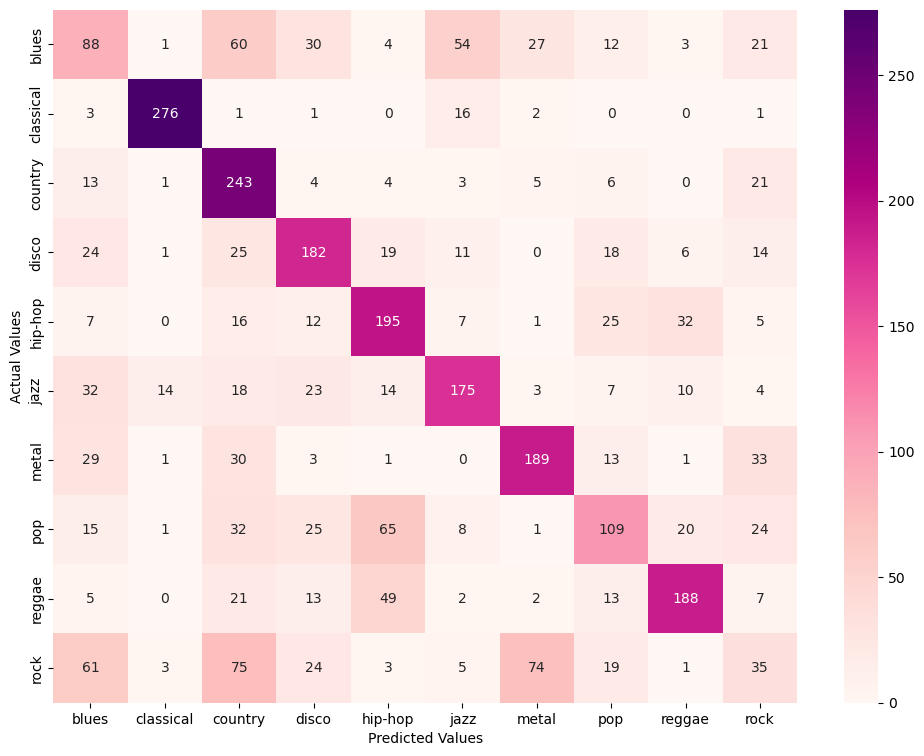

In [25]:
cm = confusion_matrix(y_actual, y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, fmt='d', cmap='RdPu')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')

In [26]:
print(classification_report(y_actual, y_pred.argmax(axis=1), target_names=genres))

              precision    recall  f1-score   support

       blues       0.32      0.29      0.31       300
   classical       0.93      0.92      0.92       300
     country       0.47      0.81      0.59       300
       disco       0.57      0.61      0.59       300
     hip-hop       0.55      0.65      0.60       300
        jazz       0.62      0.58      0.60       300
       metal       0.62      0.63      0.63       300
         pop       0.49      0.36      0.42       300
      reggae       0.72      0.63      0.67       300
        rock       0.21      0.12      0.15       300

    accuracy                           0.56      3000
   macro avg       0.55      0.56      0.55      3000
weighted avg       0.55      0.56      0.55      3000



##### The image size can impact the classifier, try with bigger melspectrograms (tried with 256x256)

##### Also try with vision transformers, they are the state-of-the-art, 4x better than CNN

##### Keras -> Reduce_LR_on_plateau() function & save models when acc is max & early stopping

##### CNN default weights initializer is broken, use `he_initializer`: https://towardsdatascience.com/why-default-cnn-are-broken-in-keras-and-how-to-fix-them-ce295e5e5f2 (default is glorot)

In [33]:
from keras.layers import LSTM, TimeDistributed, Input, Reshape, Lambda
from keras import Model

In [ ]:
# CNN combined with RNN
model = Sequential()

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    padding='same',
                    input_shape=(256, 256, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,
                    kernel_size=(3, 3),
                    padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256,
                    kernel_size=(3, 3),
                    padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(LSTM(128))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()

cnn_model = model.fit(train_generator,
                steps_per_epoch=train_generator.n//batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//batch_size)

In [ ]:
# CNN combined with RNN
model = Sequential()

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same',
                    input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    kernel_initializer='he_uniform',
                    padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

def ReshapeLayer(x):
    shape = x.shape

    reshape = Reshape((shape[1], shape[2] * shape[3]))(x)

    return reshape

model.add(Lambda(ReshapeLayer))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()

cnn_model = model.fit(train_generator,
                steps_per_epoch=train_generator.n//batch_size,
                epochs=25,
                validation_data=validation_generator,
                validation_steps=validation_generator.n//batch_size)


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_81 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 activation_82 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                

KeyboardInterrupt: 

In [ ]:
from keras.applications import VGG16

In [ ]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMSIZE, IMSIZE))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='elu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg_base.input, outputs=predictions)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

model = model.fit(train_generator,
                    steps_per_epoch=train_generator.n//batch_size,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//batch_size)